In [1]:
#importing the required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the given csv data
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")
sample = pd.read_csv("sample_submission_8RXa3c6.csv")

In [3]:
#finding the number of columns and rows
train.shape , test.shape, sample.shape

((8523, 12), (5681, 11), (5681, 3))

# Train data

### EDA

In [4]:
train.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
#finding the column names
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
#Statistical summary
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#finding the data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#Checking for null values
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### • 'Item_Weight' and 'Outlet_Size' have missing values

In [9]:
#sorting categorical values
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [10]:
#sorting numerical values
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


#### Checking for unique values

In [11]:
train['Item_Identifier'].nunique()

1559

In [12]:
train['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [13]:
train['Item_Identifier'].head(50)

0     FDA15
1     DRC01
2     FDN15
3     FDX07
4     NCD19
5     FDP36
6     FDO10
7     FDP10
8     FDH17
9     FDU28
10    FDY07
11    FDA03
12    FDX32
13    FDS46
14    FDF32
15    FDP49
16    NCB42
17    FDP49
18    DRI11
19    FDU02
20    FDN22
21    FDW12
22    NCB30
23    FDC37
24    FDR28
25    NCD06
26    FDV10
27    DRJ59
28    FDE51
29    FDC14
30    FDV38
31    NCS17
32    FDP33
33    FDO23
34    DRH01
35    NCX29
36    FDV20
37    DRZ11
38    FDX10
39    FDB34
40    FDU02
41    FDK43
42    FDA46
43    FDC02
44    FDL50
45    FDM39
46    NCP05
47    FDV49
48    FDL12
49    FDS02
Name: Item_Identifier, dtype: object

### • First 2 characters "FD','NC' and 'DR' are commonly found 

In [14]:
train['Item_Fat_Content'].nunique()

5

In [15]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

### • Fat content  is not categorized properly

In [16]:
train['Item_Type'].nunique()

16

In [17]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

### • 'Item_Type' has relation to 'Item_Identifier'

In [18]:
train['Outlet_Identifier'].nunique()

10

In [19]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [20]:
train['Outlet_Size'].nunique()

3

In [21]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [22]:
train['Outlet_Type'].nunique()

4

In [23]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

### Key points: 
### • 'Item_Weight' and 'Outlet_Size' have missing values
### •'Item_Visibility' should not be zero.
### • First 2 characters "FD','NC' and 'DR' are commonly found
### • Fat content is not categorized properly
### • 'Item_Type' has relation to 'Item_Identifier'

# Handling missing values and outlier detection

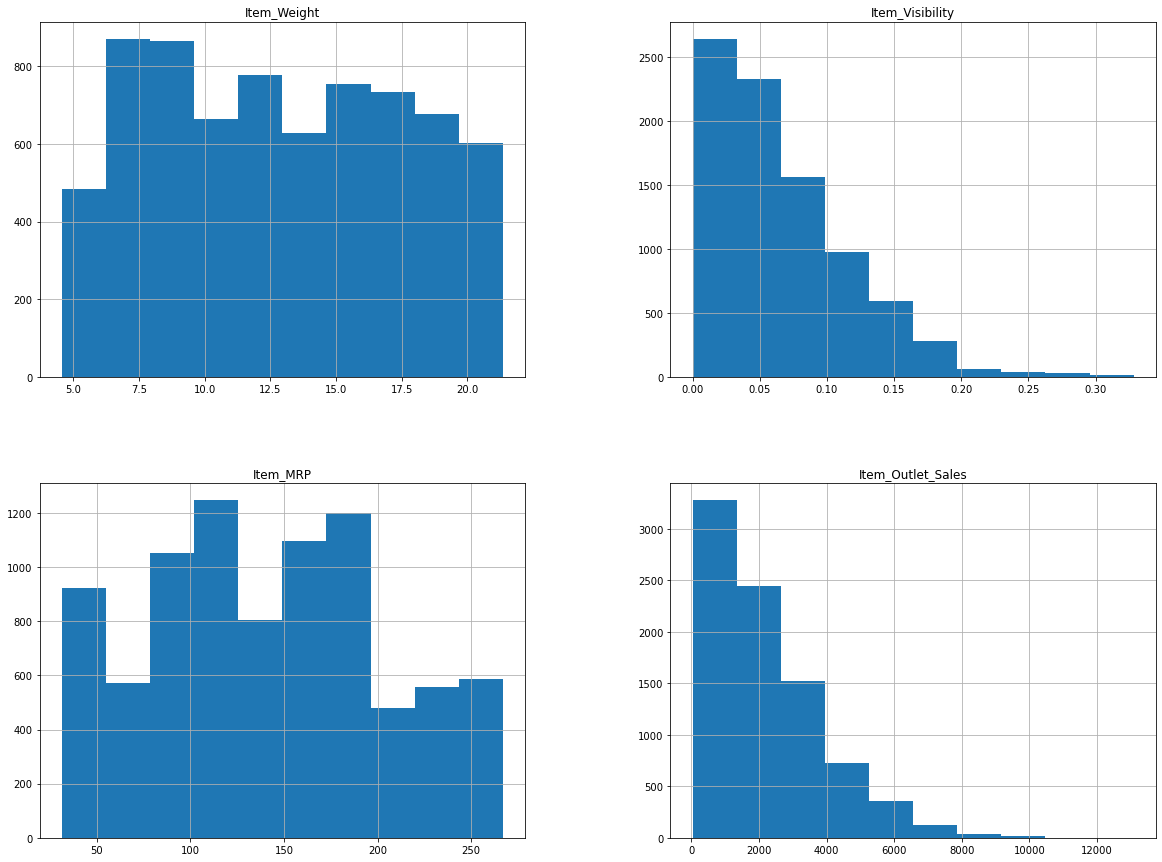

In [24]:
freq_graph = train.select_dtypes(include=['float'])
freq_graph.hist(figsize =(20,15))
plt.show()

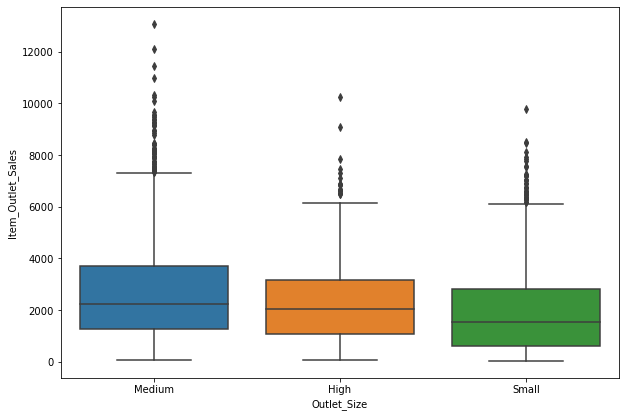

In [25]:
plt.figure(figsize=(10,9))
plt.subplot(211)
sns.boxplot(x='Outlet_Size', y ='Item_Outlet_Sales', data=train)
plt.subplots_adjust(wspace=0.2,hspace=0.4,top=1.5)

#### Mean is taken for 'Item_Weight' and Mode is taken for 'Outlet_Size'

In [26]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [27]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Mean is also taken for 'Item_Visibility'

In [28]:
#Replacing 0's with NaN
train.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)
#filling values using mean
train.Item_Visibility=train.Item_Visibility.fillna(train['Item_Visibility'].mean())

#### Categorizing 'Item_Identifier' and 'Item_Fat_Content'

In [29]:
train['Item_Identifier'] = train['Item_Identifier'].apply(lambda x : x[0:2])

In [30]:
train['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [31]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'LF': 'Low Fat','reg' : 'Regular','low fat': 'Low Fat'})

In [32]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### Changing year column 

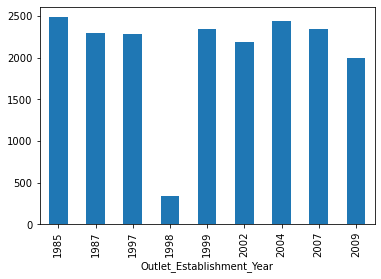

In [33]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()
plt.show();

In [34]:
train['Outlet_Years']= 2009 - train['Outlet_Establishment_Year']
train.drop('Outlet_Establishment_Year', axis=1, inplace =True)

# Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
columns =['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
label_encoder = LabelEncoder()
for i in columns:
    train[i]=label_encoder.fit_transform(train[i])

In [36]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,1,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,10
1,0,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,0
2,1,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,10
3,1,19.20,1,0.070482,6,182.0950,0,1,2,0,732.3800,11
4,2,8.93,0,0.070482,9,53.8614,1,0,2,1,994.7052,22


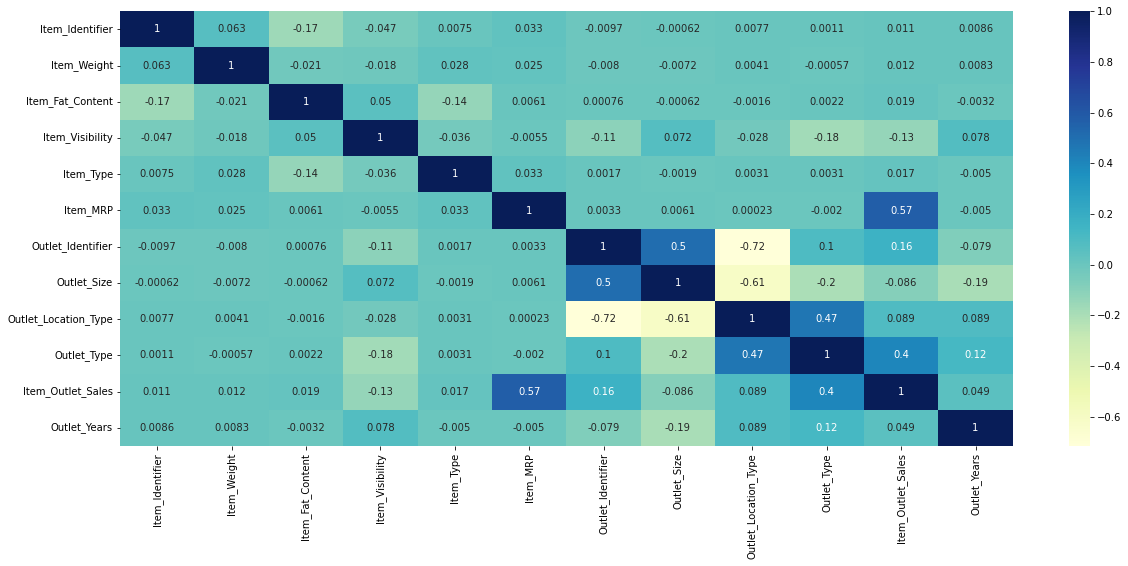

In [37]:
#plot correlation matrix
corrmatrix = train.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu');

# Test data

In [38]:
test.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [39]:
#finding the data information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [40]:
#Checking for null values
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Mean is taken for 'Item_Weight' and Mode is taken for 'Outlet_Size'

In [41]:
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

#### Categorizing 'Item_Identifier' and 'Item_Fat_Content'

In [42]:
test['Item_Identifier'] = test['Item_Identifier'].apply(lambda x : x[0:2])

In [43]:
test['Item_Identifier'].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [44]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace({'LF': 'Low Fat','reg' : 'Regular','low fat': 'Low Fat'})

In [45]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### Making a column Outlet_years and dropping 'Outlet_Establishment_Year'

In [46]:
test['Outlet_Years']= 2009 - test['Outlet_Establishment_Year']
test.drop('Outlet_Establishment_Year', axis=1, inplace =True)

# Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
columns =['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
label_encoder = LabelEncoder()
for i in columns:
    test[i]=label_encoder.fit_transform(test[i])

In [48]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,1,20.750000,0,0.007565,13,107.8622,9,1,0,1,10
1,1,8.300000,1,0.038428,4,87.3198,2,1,1,1,2
2,2,14.600000,0,0.099575,11,241.7538,0,1,2,0,11
3,1,7.315000,0,0.015388,13,155.0340,2,1,1,1,2
4,1,12.695633,1,0.118599,4,234.2300,5,1,2,3,24


# Prediction model

In [49]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,1,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,10
1,0,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,0
2,1,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,10
3,1,19.20,1,0.070482,6,182.0950,0,1,2,0,732.3800,11
4,2,8.93,0,0.070482,9,53.8614,1,0,2,1,994.7052,22


In [50]:
#Preparing inputs and outputs
X = train.drop('Item_Outlet_Sales',axis=1)
y = train['Item_Outlet_Sales']

In [51]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [52]:
Item_Outlet_Sales = regressor.predict(test)
Item_Outlet_Sales

array([1822.2946,  959.4178,  246.346 , ...,  843.5686, 4314.384 ,
       1090.5804])

In [53]:
Item_Outlet_Sales = pd.DataFrame(Item_Outlet_Sales)

In [54]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [55]:
sample['Item_Outlet_Sales']= Item_Outlet_Sales

In [56]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1822.2946
1,FDW14,OUT017,959.4178
2,NCN55,OUT010,246.3460
3,FDQ58,OUT017,3778.4150
4,FDY38,OUT027,7170.6660


In [57]:
sample.to_csv('sample.csv',index=False)